In [5]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from ta import add_all_ta_features
from ta.utils import dropna
import yfinance as yf
from yahoofinancials import YahooFinancials

from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation,Conv1D,MaxPooling1D,Flatten, Dropout


In [4]:
# installing ta -- Technical Analysis librarty that includes financial time series datasets 
#!pip install ta

In [28]:
Interval = '1h'
Start = '2021-02-03'
End = '2021-3-10'
Stock = 'MRNA'

df = yf.download(Stock, 
                      start=Start, 
                      end=End, interval=Interval,
                      progress=False)

df.reset_index(level=0, inplace=True)


print(len(df))
#df = df[:-1]
df

168


,index,Open,High,Low,Close,Adj Close,Volume
0,2021-02-03 09:30:00-05:00,158.580002,164.429306,158.445007,160.210907,160.210907,3204059
1,2021-02-03 10:30:00-05:00,160.199997,162.899994,159.449997,161.979996,161.979996,1172670
2,2021-02-03 11:30:00-05:00,162.000000,164.183197,161.229996,164.180695,164.180695,973951
3,2021-02-03 12:30:00-05:00,164.178894,166.660004,163.500000,166.660004,166.660004,1579895
4,2021-02-03 13:30:00-05:00,166.510101,166.649902,165.000000,165.916000,165.916000,996845
...,...,...,...,...,...,...,...
163,2021-03-09 11:30:00-05:00,128.865005,129.169998,127.379997,127.849998,127.849998,514438
164,2021-03-09 12:30:00-05:00,127.870003,132.300003,127.500000,131.880005,131.880005,1036385
165,2021-03-09 13:30:00-05:00,131.880005,132.100006,128.927597,129.029999,129.029999,713293
166,2021-03-09 14:30:00-05:00,129.070007,131.949997,128.850006,131.309998,131.309998,640246


In [29]:
%matplotlib notebook

<IPython.core.display.Javascript object>


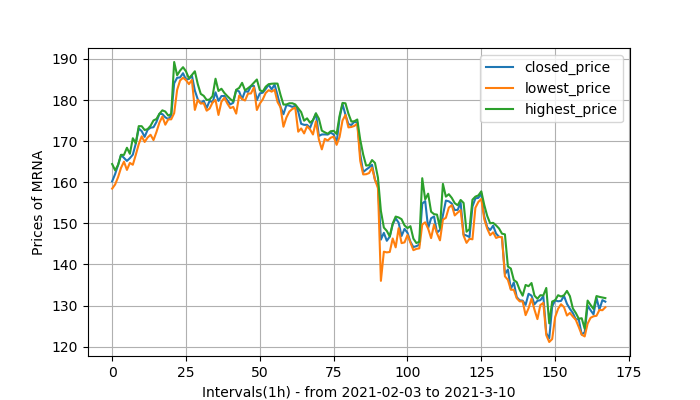

In [37]:
plt.figure(figsize = (7,4))
plt.plot(df['Close'], label = 'closed_price')
plt.plot(df['Low'], label = 'lowest_price')
plt.plot(df['High'], label = 'highest_price')




plt.xlabel('Intervals(1h) - from ' + Start + ' to ' + End)
plt.ylabel('Prices of ' + Stock)
plt.grid()
plt.legend()
plt.show()

In [78]:
%%capture

mom_data = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume") 



RSI_set = mom_data['momentum_rsi'].values[45:]             


MACD_set = mom_data['trend_macd_diff'].values[45:]           


trix_set = mom_data['trend_trix'].values[45:]      

price_set = mom_data['Close'].values[45:] 


<IPython.core.display.Javascript object>


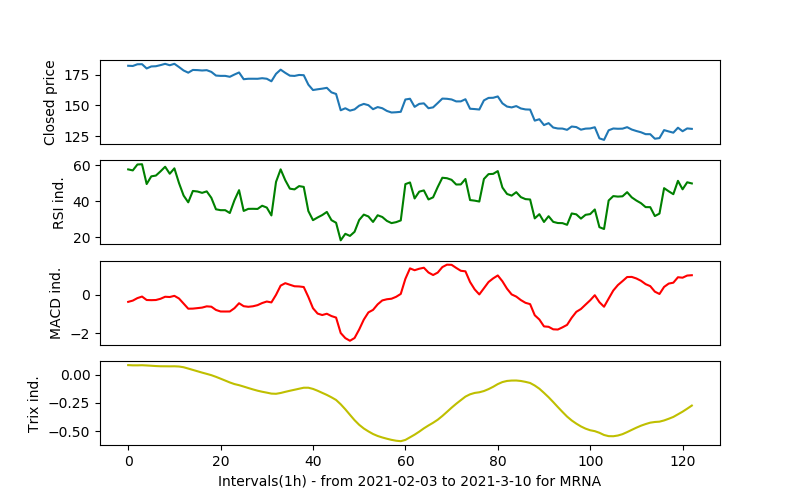

In [79]:
from math import pi

plt.figure(figsize=(8,5))

#plt.subplots_adjust(hspace=-.1)

ax1 = plt.subplot(4,1,1) 
plt.plot(df['Close'].values[45:])
plt.ylabel('Closed price')
plt.tick_params(axis='x',which='both', bottom=False,labelbottom=False) 

#plt.title('subplot(2,1,1)')

ax2 = plt.subplot(4,1,2) 
plt.plot(RSI_set, 'g')
plt.ylabel('RSI ind.')
plt.tick_params(axis='x',which='both', bottom=False,labelbottom=False) 


ax3 = plt.subplot(4,1,3) 
plt.plot(MACD_set, 'r')
plt.ylabel('MACD ind.')

plt.tick_params(axis='x',which='both', bottom=False,labelbottom=False) 

ax4 = plt.subplot(4,1,4) 
plt.plot(trix_set, 'y')
plt.xlabel('Intervals(1h) - from ' + Start + ' to ' + End + ' for ' + Stock)
plt.ylabel('Trix ind.')




#plt.axes(ax1) 
#plt.plot(np.cos(2*x), 'r--')


plt.show()

In [89]:
Training_data = []
for i in range(len(RSI_set)):
    Training_data.append([RSI_set[i],MACD_set[i], trix_set[i]])

Label = np.array(price_set)
Training_data = np.array(Training_data) 

In [90]:
Training_data

array([[ 5.77620769e+01, -3.64889932e-01,  8.44687857e-02],
       [ 5.71988544e+01, -2.98957369e-01,  8.24767979e-02],
       [ 6.04851056e+01, -1.68228032e-01,  8.23833000e-02],
       [ 6.06237159e+01, -8.80407303e-02,  8.34621477e-02],
       [ 4.96297284e+01, -2.68116082e-01,  8.13411930e-02],
       [ 5.38941942e+01, -2.75874537e-01,  7.87985028e-02],
       [ 5.43296921e+01, -2.68233274e-01,  7.61150352e-02],
       [ 5.66699835e+01, -2.03592168e-01,  7.42925061e-02],
       [ 5.92289874e+01, -9.81720220e-02,  7.41010944e-02],
       [ 5.53355247e+01, -1.11617922e-01,  7.36178748e-02],
       [ 5.83484970e+01, -5.08694530e-02,  7.40836087e-02],
       [ 5.01577342e+01, -1.89192328e-01,  7.21659233e-02],
       [ 4.32041420e+01, -4.55456803e-01,  6.55646350e-02],
       [ 3.94590396e+01, -7.21822202e-01,  5.40653581e-02],
       [ 4.57726123e+01, -7.17371711e-01,  4.20851318e-02],
       [ 4.54735403e+01, -6.91749232e-01,  3.00766212e-02],
       [ 4.47231525e+01, -6.64109810e-01

In [91]:

xtrain = Training_data
xtrain = xtrain.reshape(-1, len(xtrain), np.shape(Training_data)[1])

ytrain = Label
ytrain = ytrain.reshape(-1, len(ytrain), 1)




In [92]:
%%time


model = tf.keras.Sequential([
        
    
    tf.keras.layers.Reshape((len(ytrain[0]), np.shape(xtrain)[2]), input_shape=(len(ytrain[0]),np.shape(xtrain)[2])),
    
    
    
    tf.keras.layers.Conv1D(32,3,padding='same',activation='relu'),
    tf.keras.layers.Conv1D(16,3,padding='same',activation='relu'),

    

    tf.keras.layers.LSTM(32, input_shape=(50, 3), return_sequences=True),
    
    tf.keras.layers.LSTM(16, input_shape=(50, 3), return_sequences=True),

    tf.keras.layers.LSTM(8, input_shape=(50, 3), return_sequences=True),


    tf.keras.layers.Dense(512),
    tf.keras.layers.Dense(512),


    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(256),


    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(128),


    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(64),


    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(32),


    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(16),

    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(8),



    tf.keras.layers.Dense(1, kernel_initializer=tf.initializers.zeros)
    ])


model.compile(loss="mean_absolute_error", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics= ['accuracy'])





CPU times: user 1.14 s, sys: 47.4 ms, total: 1.19 s
Wall time: 1.31 s


In [93]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 123, 3)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 123, 32)           320       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 123, 16)           1552      
_________________________________________________________________
lstm (LSTM)                  (None, 123, 32)           6272      
_________________________________________________________________
lstm_1 (LSTM)                (None, 123, 16)           3136      
_________________________________________________________________
lstm_2 (LSTM)                (None, 123, 8)            800       
_________________________________________________________________
dense (Dense)                (None, 123, 512)          4

In [94]:
from keras.callbacks import History

In [95]:
history = History()

In [97]:
%%time

model.fit(xtrain,ytrain,shuffle=False,epochs=500, batch_size=16,callbacks=[history])

Epoch 1/500
1/1 [==============================] - 0s 127ms/step - loss: 4.1336 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 128ms/step - loss: 4.3036 - accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 127ms/step - loss: 4.3025 - accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 124ms/step - loss: 4.1324 - accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 139ms/step - loss: 4.1380 - accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 132ms/step - loss: 4.1475 - accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 125ms/step - loss: 4.0820 - accuracy: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 0s 124ms/step - loss: 4.0458 - accuracy: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 0s 133ms/step - loss: 4.1137 - accuracy: 0.0000e+00
Epoch 10/500
1/1 [==============================] - 0s 146ms/step - loss:

<IPython.core.display.Javascript object>


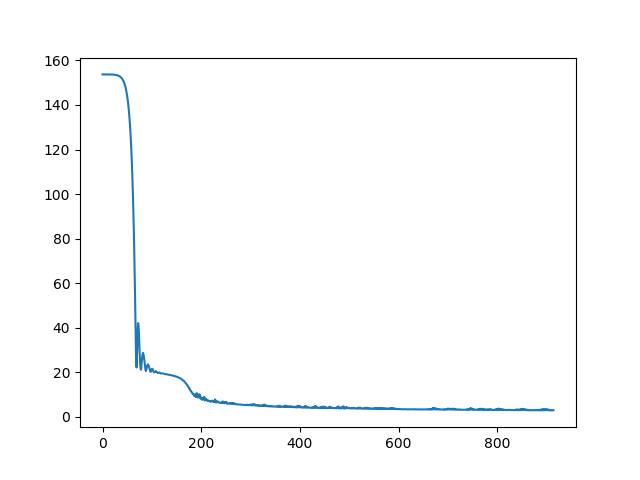

In [98]:
plt.figure()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])


plt.show()

<IPython.core.display.Javascript object>


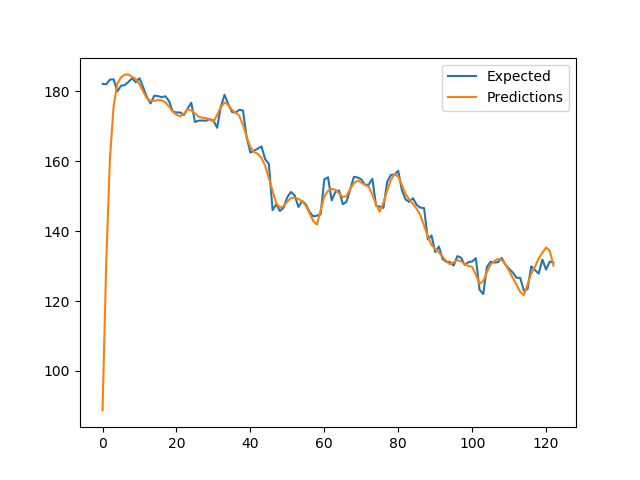

In [102]:
plt.figure()


xaxis = np.array(range(len(np.squeeze(ytrain))))

plt.plot(xaxis,np.squeeze(ytrain),label = 'Expected')
plt.plot(xaxis,np.squeeze(model.predict(xtrain)),label = 'Predictions')



plt.legend()
